### Questions
* ROC/AUC curves
* What kind of datasets lend themselves to logistic regression vs other classifiers?
* How do you determine what weights to give classes

### Objectives
YWBAT
* give 3 examples of when logistic regression is used in the real world
    * credit risk (loan risk) - low risk, high risk, medium risk
    * spam filters - spam emails vs non spam
        * 0 - non spam
        * 1 - spam
        * type II error with regards to spam detection
            * Marks as spam and it isn't
        * type I error is
            * not catching spam
    * medical testing ex: ebola, cancer, ...
    * sentence -> intent (0 or 1)
    * fraud detection - recall vs precision
    * friend suggestion on facebook
    * recommendations on sell/buy stock
    
* explain how linear regression is tied to logistic regression
* explain the purpose of a sigmoid function


* When does a high vs low threshold matter

### Outline

In [66]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt

### Let's load in some mocked data

In [26]:
df = pd.read_csv("data.csv")
x = df["x"]
y = df["y"]
df.head()

,x,y
0,0.514780,1.0
1,-3.279173,0.0
2,-3.845859,0.0
3,0.947575,1.0
4,1.884433,1.0


### Plotting our points with color

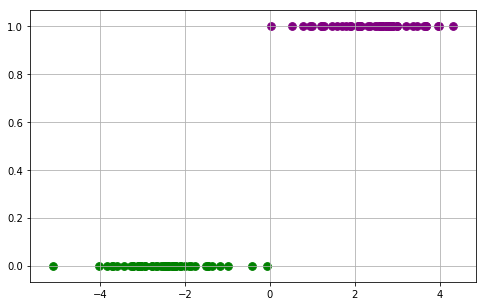

In [33]:
color_dict = {0: 'green', 1: 'purple'}
plt.figure(figsize=(8, 5))
plt.grid()
for i, j in zip(x, y):
    plt.scatter(i, j, color=color_dict[j], s=60)
plt.show()

# a value at x=0 would throw things off because both classes have x = 0

### Why is Linear Regression no longer sufficient?
* The range of linreg = -infty to infty 
* The range of our classes are 0 and 1

* Plugging in our linear regression equation into a sigmoid function bounds it between 0 and 1. 
    * This is also normalization

### How can we estimate these points?     

$$f(x)= \frac{1}{1 + e^{-c_1(x - c_2)}}$$   
![](logreg.gif)

In [34]:
def sigmoid(x, c1=1, c2=0):
    num = 1
    den = 1 + np.exp(-c1*(x - c2))
    return num / den

In [58]:
y_pred = sigmoid(x, c1=3, c2=0.20)

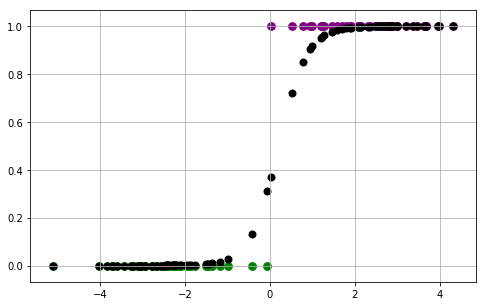

In [59]:
color_dict = {0: 'green', 1: 'purple'}
plt.figure(figsize=(8, 5))
plt.grid()
for i, j in zip(x, y):
    plt.scatter(i, j, color=color_dict[j], s=60)
plt.scatter(x, y_pred, color='k', linewidth=2)
plt.show()

### Why are these labels better than our y_preds
    * We can start predicting once we have labels

### What are the y_pred values similar to? Probability

In [91]:
def get_labels(y_pred, thresh=0.50):
    labels = []
    for pred in y_pred:
        if pred >= thresh:
            labels.append(1)
        else:
            labels.append(0)
    return labels


def get_labels2(y_probs, thresh=0.50):
    labels = []
    for pred in y_probs: # pred = [float, float]
        if pred[1] >= thresh:
            labels.append(1)
        else:
            labels.append(0)
    return labels

In [56]:
def get_p_n_dict(true_labels, predicted_labels):
    d = {"TP": 0, "TN": 0, "FP":0, "FN": 0}
    
    for tl, pl in zip(true_labels, predicted_labels):
        if pl == 1:
            if tl == 0:
                d["FP"] += 1
            elif tl == 1:
                d["TP"] += 1
        
        if pl == 0:
            if tl == 0:
                d["TN"] += 1
            elif tl == 1:
                d["FN"] += 1
    return d


# maximizing recall is minimizing False Negatives (FN)
def recall(true_labels, predicted_labels):
    d = get_p_n_dict(true_labels, predicted_labels)
    rec_score = d["TP"] / (d["TP"] + d["FN"])
    
    return rec_score


# maximizing precision is minimizing False Positives (FP)
def precision(true_labels, predicted_labels):
    d = get_p_n_dict(true_labels, predicted_labels)
    prec_score = d["TP"] / (d["TP"] + d["FP"])
    return prec_score


def accuracy(true_labels, predicted_labels):
    d = get_p_n_dict(true_labels, predicted_labels)
    num = d["TP"] + d["TN"]
    den = sum(d.values())
    acc_score = num / den
    return acc_score

In [64]:
labels = get_labels(y_pred, thresh=0.15)
recall(y, labels), precision(y, labels), accuracy(y, labels)

(1.0, 0.9803921568627451, 0.99)

In [65]:
logreg = LogisticRegression()

In [67]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.60)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [76]:
xtr = xtrain.values
type(xtr)

numpy.ndarray

In [81]:
logreg.fit(xtrain.values.reshape(-1, 1), ytrain.values.reshape(-1, 1))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
### out of the box predictions using sklearn uses 50% threshold
logreg.predict(xtest.values.reshape(-1, 1))

array([0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1.])

In [97]:
### predict_proba gives you probablities for each value [prob(0|X), prob(1|X)]
ytest_probs = logreg.predict_proba(xtest.values.reshape(-1, 1))
predlabels = get_labels2(ytest_probs, thresh=0.99)

In [109]:
cm = confusion_matrix(ytest, predlabels)
cm

array([[25,  0],
       [10,  5]])

In [110]:
import seaborn as sns

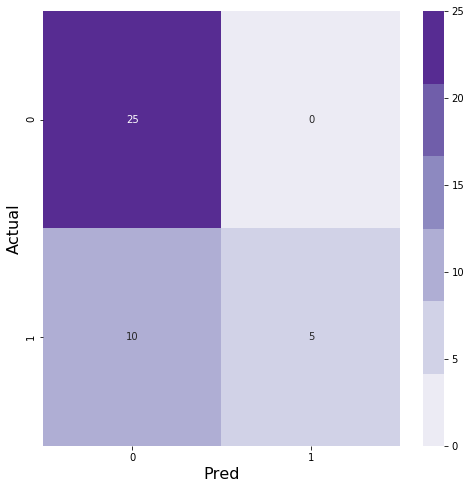

In [111]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap=sns.color_palette('Purples'))
plt.xlabel("Pred", fontsize=16)
plt.ylabel("Actual", fontsize=16)
plt.show()

### Assessment
* Learned the process of modeling using logreg outside of sklearn
* Better idea of what thresholds adjust
* More fluent with TP, FP, ...
* Learned how to read a confusion matrix
* How to program functions from scratch
* Setting thresholds for labeling data
* Using sklearn to compute confusion matrix and using seaborn
* predict vs predict_proba